# Translatation of a Stochastic Process
Author: Lohit Vandanapu
Date: August 20, 2018

In this example, a Gaussian stochastic processes is translated into a stocahstic processes of a number of distributions. This example illustrates how to use the Translate class to translate from Gaussian to other probability distributions and compare how the statistics of the translated stochastic processes change along with distributions.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Translate class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.StochasticProcess import Translation
from UQpy.StochasticProcess import SRM
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Firstly we generate Gaussian Stochastic Processes using the Spectral Representation Method.

In [2]:
n_sim = 10000  # Num of samples
T = 100  # Time(1 / T = dw)
nt = 256  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dt = T / nt
t = np.linspace(0, T - dt, nt)
dw = F / nw
w = np.linspace(0, F - dw, nw)
S = 125 / 4 * w ** 2 * np.exp(-5 * w)
SRM_object = SRM(n_sim, S, dw, nt, nw, case='uni')
samples = SRM_object.samples

In [3]:
def S_to_R(S, w, t):
    dw = w[1] - w[0]
    fac = np.ones(len(w))
    fac[1: len(w) - 1: 2] = 4
    fac[2: len(w) - 2: 2] = 2
    fac = fac * dw / 3
    R = np.zeros(len(t))
    for i in range(len(t)):
        R[i] = 2 * np.dot(fac, S * np.cos(w * t[i]))
    return R

In [4]:
r_g = S_to_R(S, w, t)

We translate the samples to be Uniform samples from 1 to 2

In [5]:
Translate_object = Translation(samples, r_g, 'Uniform', [0, 1])
samples_ng = Translate_object.samples_ng
r_ng = Translate_object.R_ng

Plotting the actual and translated autocorrelation functions

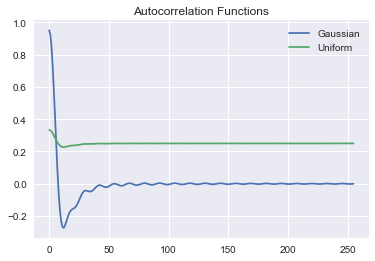

In [6]:
fig1 = plt.figure()
plt.plot(r_g, label='Gaussian')
plt.plot(r_ng, label='Uniform')
plt.title('Autocorrelation Functions')
plt.legend()
plt.show()